# `FINAL PROJECT`

## **GAME ANALYSIS**

`Group ID`: 16

`Group Member`: 
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

## **OBJECTIVES**

1. Data
- Topic: Top-Grossing Steam Games in 2024 Analysis.
- Source of the data: [Top 1500 games on steam by revenue 09-09-2024](https://www.kaggle.com/datasets/alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024?fbclid=IwY2xjawF9_a9leHRuA2FlbQIxMAABHdX-MCoSjEUQ5nUxd9hS1YQEw4_VUAibpOZSuD0IWuGAmbE8wO4f7Ol9cw_aem_nXW-bKNT1rsRoEIfvtSw5Q) by [Kaggle](https://www.kaggle.com/)

2. Objectives
- Analyze movie data to uncover insights into the influence of factors release date, copies sold price, revenue, average playtime, review score, publisher class, publishers, developers on revenue
- Explore the relationship between game characteristics.

## **SETUP AND IMPORTS**

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime

## **DATA COLLECTING**

### What subject is your data about? What is the source of your data?
- Our dataset is about the revenue of 1500 games on Steam 09-09-2024. This dataset is taken from Kaggle - the world's largest data science community with powerful tools and resources.
### Do authors of this data allow you to use like this ? You can check the data license
- The authors of this data do allow us to use since he uploaded it on Kaggle and the license of his dataset is Apache 2.0.
- Apache 2.0 is an open-source software license published by the Apache Software Foundation and it allows developers to freely use, modify, and distribute while ensuring that the original authors receive proper credit.
### How did authors collect data?
- The authors downloaded this data freely from `Gamalytic` - a legal database of 50,000+ Steam games with estimated revenue, sales, player data and more. It is for game developers, marker researchers,.. 
- This dataset is obtained legally. 

## **DATA PREPROCESSING AND EXPLORATION**

### READ DATA

In [297]:
file_path = "Steam_2024_bestRevenue_1500.csv"
from charset_normalizer import detect

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = detect(f.read())
        return result['encoding']

def read_data(file_path):
    data = pd.read_csv(file_path, encoding='utf-8-sig')
    return data
data = read_data(file_path)


### HOW MANY ROWS AND HOW MANY COLUMNS?

In [298]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1500
Number of columns: 11


### THE MEANING OF EACH ROW

Each row represents an individual game, and the columns provide details about the game's release, sales, price, revenue, average playtime, and ratings, along with information about the publisher and developer, steamID.

### DUPLICATED ROWS

In [299]:
def normalize_data(row):
    return row.apply(
        lambda x: str(sorted([str(v).strip().lower() for v in x])) if isinstance(x, list) 
        else str(x).strip().lower()
    )

normalized_df = data.apply(normalize_data, axis=1)

num_duplicated_rows = normalized_df.duplicated().sum()

if num_duplicated_rows > 0:
    duplicates = data[normalized_df.duplicated(keep=False)]
    print(f"The raw data has {num_duplicated_rows} duplicated rows.")
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated data found.")

No duplicated data found.


### THE MEANING OF EACH COLUMN

- `name`: This column contains the name or title of the game.
- `releaseDate`: This column records the release date of the game. It is the date the game was officially made available to the public.
- `copiesSold`: This column represents the total number of copies of the game sold. This could refer to physical or digital copies.
- `price`: The price of the game when it was released.
- `revenue`: The total revenue generated from the sales of the game.
- `avgPlaytime`: This represents the average playtime of the game, often measured in hours.
- `reviewScore`: This column contains the average review score for the game.
- `publisherClass`: This indicates the classification of the publisher. It can be a general categorization such as "Indie," "AAA," or other types of publishers based on size, resources, and market reach.
- `publishers`: This column lists the name of the publisher of the game. Publishers are companies that manage the distribution and marketing of the game.
- `developers`: This column lists the names of the developers who created and worked on the game. 
- `steamId`: The unique identifier (ID) associated with the game on the Steam platform. 

### DATA TYPE OF EACH COLUMN

In [300]:
data.dtypes

name               object
releaseDate        object
copiesSold          int64
price             float64
revenue           float64
avgPlaytime       float64
reviewScore         int64
publisherClass     object
publishers         object
developers         object
steamId             int64
dtype: object

### ARE THESE COLUMNS HAVING INAPPROPRIATE DATA TYPES?

Since all the columns's datatypes are `object`, we need to change into the appropriate datatypes:
-  `releaseDate`: This column should be `datetime`.
- `copiesSold`: This column should represent numeric data (`int` or `float`).
- `price`: This column should represent numeric data (`float`).
- `revenue`: This column should represent numeric data (`float`).
- `avgPlaytime`: This column should represent numeric data (`float`).
- `reviewScore`: This column should represent numeric data (`int` or `float`). 

In [301]:
data['releaseDate'] = pd.to_datetime(data['releaseDate'], format='%d-%m-%Y', errors='coerce') 
data['copiesSold'] = pd.to_numeric(data['copiesSold'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['avgPlaytime'] = pd.to_numeric(data['avgPlaytime'], errors='coerce')
data['reviewScore'] = pd.to_numeric(data['reviewScore'], errors='coerce')
data['steamId'] = data['steamId'].astype('object')

### NEW DATATYPES OF EACH COLUMNS

In [302]:
data.dtypes

name                      object
releaseDate       datetime64[ns]
copiesSold                 int64
price                    float64
revenue                  float64
avgPlaytime              float64
reviewScore                int64
publisherClass            object
publishers                object
developers                object
steamId                   object
dtype: object

### THE DISTRIBUTION OF NUMERICAL COLUMNS

#### Value distribution

The code above is designed to plot the distribution for all numerical columns in the dataset. Each column will be displayed separately with a distribution plot, allowing the user to observe the distribution of data across the numerical columns.

First, the code identifies all the columns with a numerical data type.  
Then, for each numerical column, it plots a histogram to show the frequency of the values in that column. 
 
The histogram is displayed with 15 bins to give a detailed view of the data distribution.

In [303]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("numerical columns:", numerical_cols)
numerical_stats = data[numerical_cols].describe().T
print("\nDescriptive Statistics:")
numerical_stats

numerical columns: ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
copiesSold,1500.0,1.414826e+05,1.132757e+06,593.0,4918.750000,11928.500000,37869.750000,3.073915e+07
price,1500.0,1.751951e+01,1.264661e+01,0.0,9.990000,14.990000,19.990000,9.999000e+01
revenue,1500.0,2.632382e+06,2.781024e+07,20674.0,45504.250000,109053.000000,455156.750000,8.377934e+08
avgPlaytime,1500.0,1.256270e+01,2.154217e+01,0.0,3.564848,6.762776,13.104473,2.963329e+02
reviewScore,1500.0,7.620133e+01,2.431944e+01,0.0,72.000000,83.000000,92.000000,1.000000e+02


##### Copies Sold Distribution

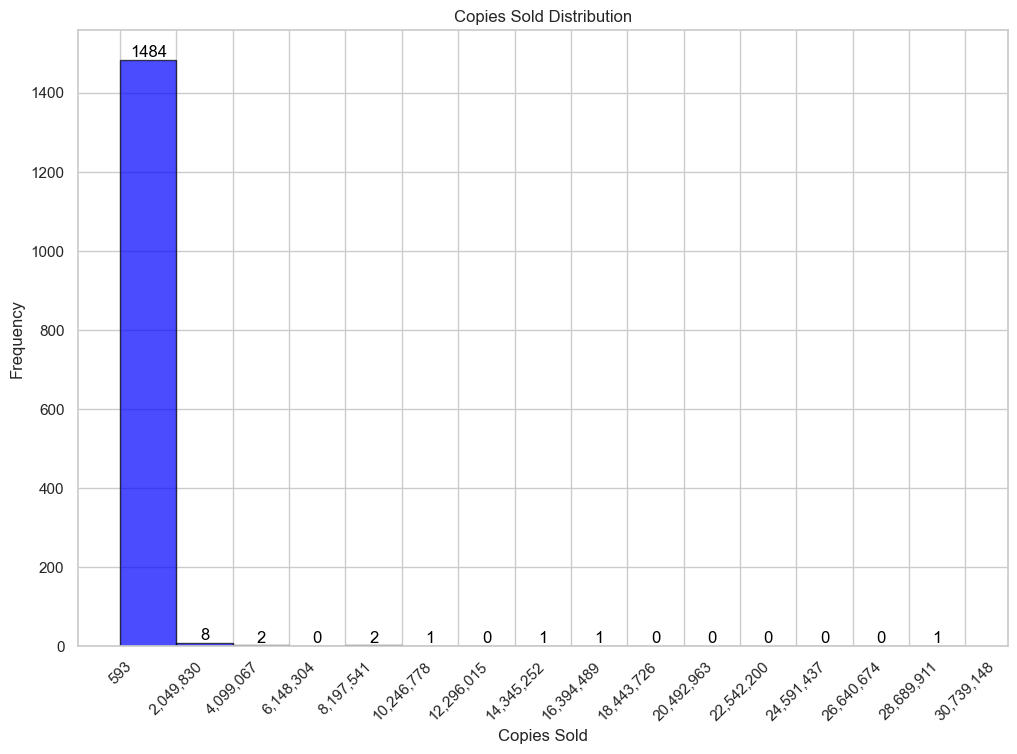

In [304]:
def format_number(x, _):
    return f"{int(x):,}"

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['copiesSold'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Copies Sold Distribution")
plt.xlabel("Copies Sold")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()


- The majority of values are concentrated in the very low range (near the first bin), indicating that most products have a very low number of copies sold compared to a few outliers.
- A few outliers are present in the far-right region of the chart, with very high values appearing infrequently.
- The first bin dominates the chart, with 1,484 occurrences, showing that most products have sold fewer than 2,049,830 copies.
- While there are some very high values (above 10,000,000), the number of products reaching such high sales is extremely rare, with only 1–2 occurrences.

##### Price Distribution

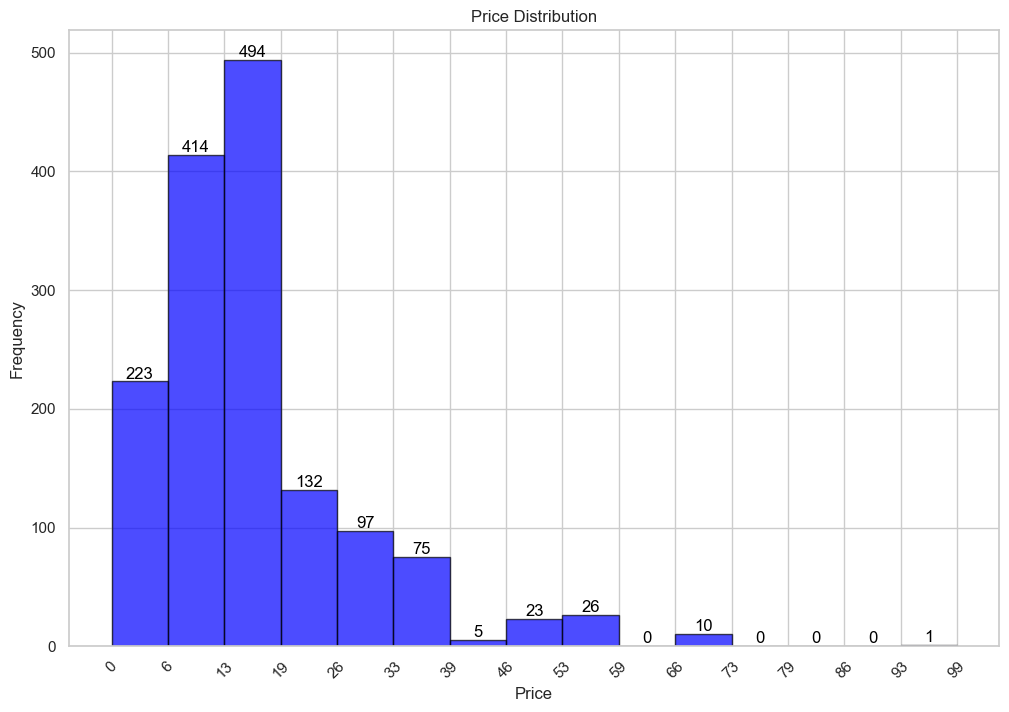

In [305]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['price'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- Most values are concentrated in the lower range (the first few bins), indicating that the majority of products have low prices, while only a few have higher prices.
- A few outliers are present on the far right of the chart, with very low frequency.
- The first bin dominates the chart, with 494 products, showing that most products are priced below 6$.
- The data extends to higher price ranges (above 60$), but the number of products reaching these prices is extremely rare, with only 1–10 products.

##### Revenue Distribution

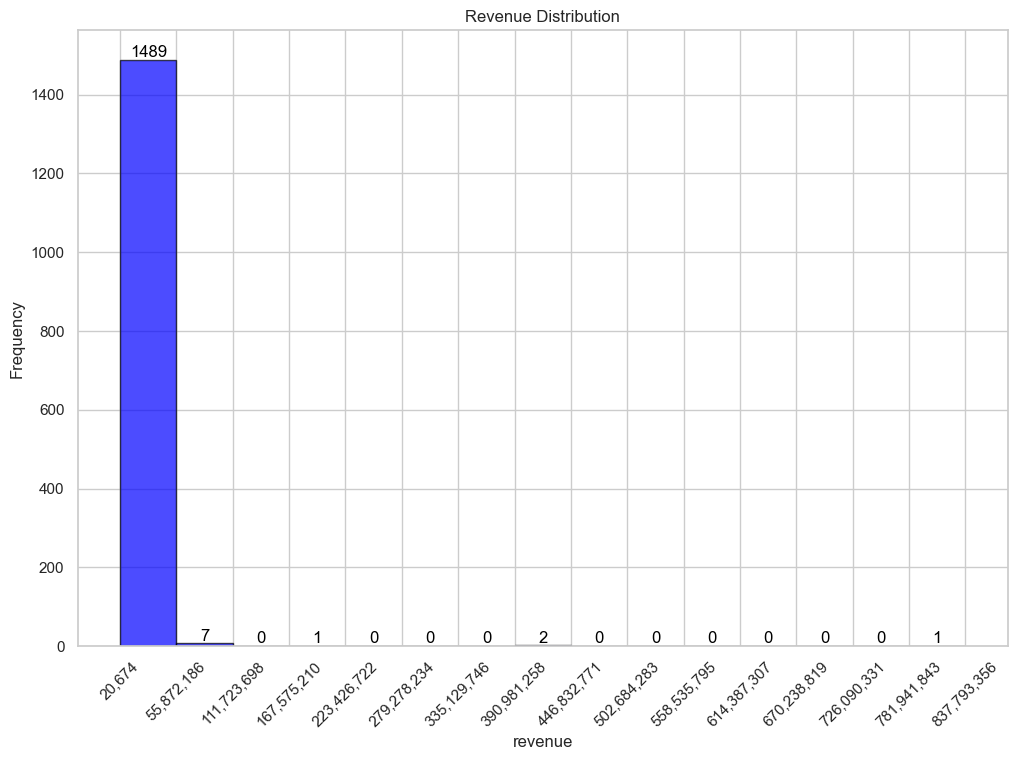

In [306]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['revenue'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Revenue Distribution")
plt.xlabel("revenue")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of values are concentrated in the first bin, indicating that most products generate very low revenue compared to a few outliers with extremely high revenue.
- There are a few extreme outliers with very high revenue, but their frequency is almost negligible compared to the majority.
- The first bin completely dominates the chart with 1,489 occurrences, showing that the vast majority of products generate revenue close to the lowest range.
- Products generating revenue in higher ranges (above 55,872,186) are extremely rare, with frequencies ranging from 0 to 7.

##### Average Playtime Distribution

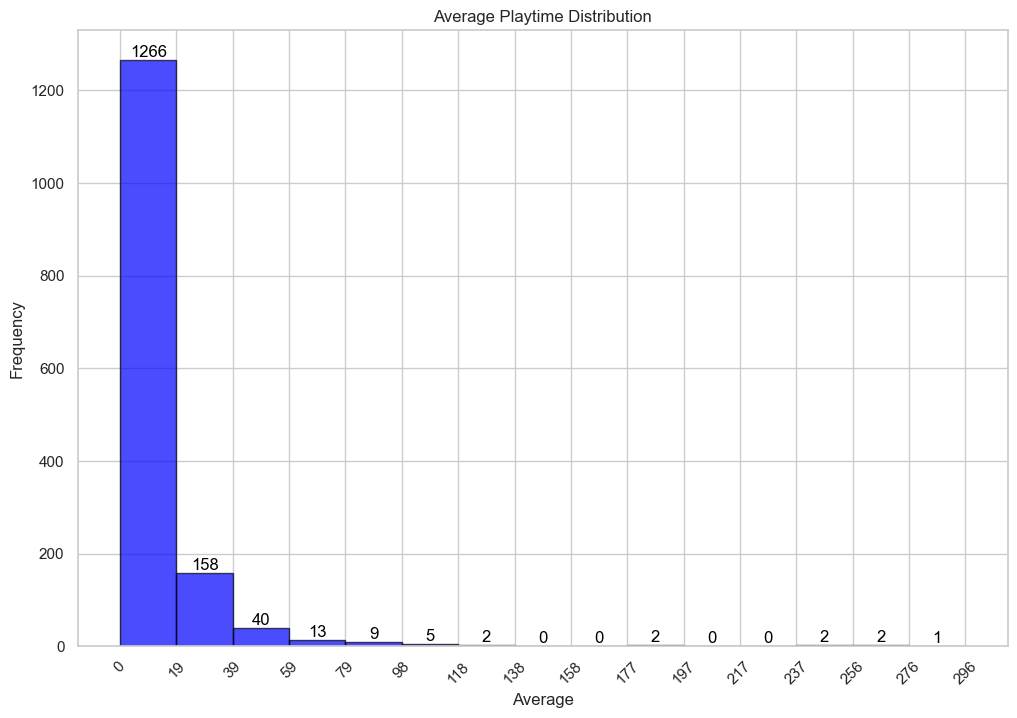

In [307]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['avgPlaytime'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Average Playtime Distribution")
plt.xlabel("Average")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of the values are concentrated in the first bin (average playtime 0-19 hours), with a frequency of 1,266. This indicates that most users spend a minimal amount of time playing.
- The frequency drops significantly in the subsequent bins. For example, only 158 users fall within the 19-39 hours range, and this trend continues with much smaller frequencies in higher bins.
- Instances of very high playtime (200+ hours) are extremely rare, with frequencies of only 1 or 2.
- The dataset suggests that users with low playtime overwhelmingly dominate, while those with medium to high playtime are significantly fewer.

##### Review Score Distribution

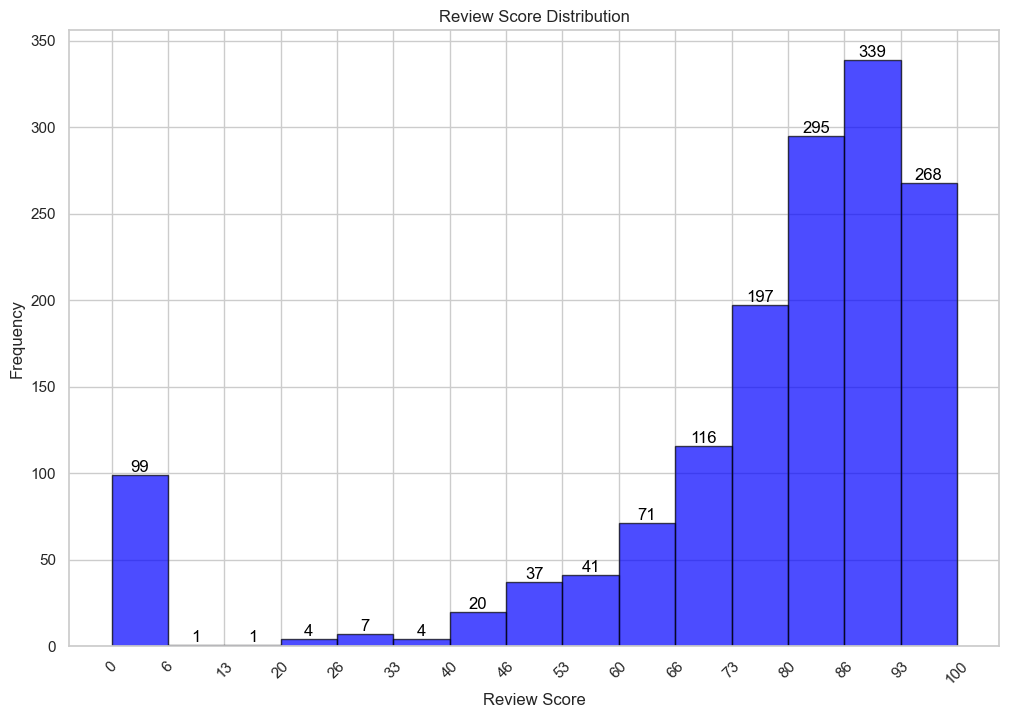

In [308]:
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(data['reviewScore'].dropna(), bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Frequency")

plt.xticks(bins, rotation=45)

for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{int(counts[i])}', 
                ha='center', va='bottom', color='black')

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))

plt.show()

- The majority of the values are concentrated in the highest review score range (80-100), with a peak frequency of 339. This suggests that most reviews are overwhelmingly positive.
- The frequency decreases as the review score lowers. For instance, the frequency drops to 197 for scores in the 70-80 range and continues to decline for lower bins.
- Extremely low review scores (0-20) are relatively rare, with frequencies ranging from 1 to 99, indicating that very negative reviews are uncommon.
- The dataset demonstrates that positive review scores dominate, while neutral and negative scores are significantly less frequent.

#### Missing value

Calculate ratio of missing values by selecting numerical columns, checking for missing values (NaN), calculating the percentage of missing values

In [309]:
missing_values = data[numerical_cols].isnull().mean() * 100
missing_values

copiesSold     0.0
price          0.0
revenue        0.0
avgPlaytime    0.0
reviewScore    0.0
dtype: float64

#### Abnormal

- First, we calculate basic values for each numerical column, including the minimum value, maximum value, the 25th percentile (Q1), and the 75th percentile (Q3).
- The distance between the 75th and 25th percentiles (IQR) helps determine the spread of the data.
- Based on the IQR, we calculate the lower and upper boundaries using the formulas:
    - Lower Bound = Q1 - 1.5 * IQR
    - Upper Bound = Q3 + 1.5 * IQR
- Values that fall outside these boundaries are considered outliers. Specifically, if the minimum value in the column is less than the lower bound or the maximum value is greater than the upper bound, they are identified as outliers.

In [310]:
outlier_results = {}

for col in numerical_cols:
    min_val = data[col].min()
    max_val = data[col].max()

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    is_min_outlier = min_val < lower_lim
    is_max_outlier = max_val > upper_lim

    outlier_results[col] = {
        "Min": min_val,
        "Max": max_val,
        "Lower Limit": lower_lim,
        "Upper Limit": upper_lim,
        "Is Min Outlier": is_min_outlier,
        "Is Max Outlier": is_max_outlier,
    }

outlier_df = pd.DataFrame(outlier_results).T
outlier_df


,Min,Max,Lower Limit,Upper Limit,Is Min Outlier,Is Max Outlier
copiesSold,593,30739148,-44507.75,87296.25,False,True
price,0.0,99.99,-5.01,34.99,False,True
revenue,20674.0,837793356.0,-568974.5,1069635.5,False,True
avgPlaytime,0.0,296.332852,-10.744591,27.413912,False,True
reviewScore,0,100,42.0,122.0,True,False


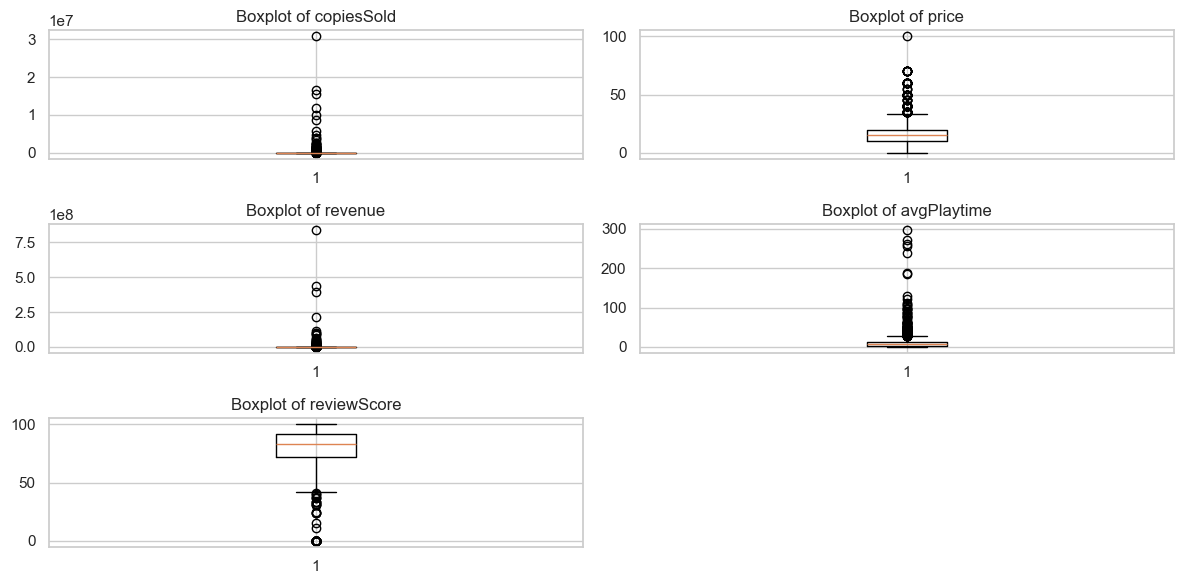

In [45]:
n_cols = 2  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6)) 
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(x=data[col])
    axes[i].set_title(f'Boxplot of {col}')

# Ẩn các ô dư thừa (nếu số cột không chia hết)
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Điều chỉnh bố cục để tránh tràn
plt.show()

Observing the charts, we can see that there are many outliers. To ensure that no valuable information is removed or bias is introduced, we have decided not to remove the outliers.

### THE DISTRIBUTION OF CATEGORICAL VALUES

Before evaluating the distribution of categorical values, we firstly identify the categorical columns in the dataset.

The categorical columns in the dataset:

In [311]:
cat_col_info = data.select_dtypes(exclude=['number']).columns.to_list()
print("Categorical columns:", cat_col_info)

Categorical columns: ['name', 'releaseDate', 'publisherClass', 'publishers', 'developers', 'steamId']


#### Samples 

Here are some samples of these columns:

In [312]:
# Set pandas options to display full content without truncation
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)     

def unique_values_info(data, columns):
    info = {}
    for col in columns:
        unique_samples = data[col].dropna().unique()[:5] 
        info[col] = {
            'Sample Values': unique_samples
        }
    return info

unique_info = unique_values_info(data, cat_col_info)

unique_info_df = pd.DataFrame.from_dict(unique_info, orient='index')

unique_info_df

,Sample Values
developers,"[Visual Concepts, SANDLOT, Ironclad Games Corporation,Stardock Entertainment, Obb Studio Inc., ATLUS]"
name,"[WWE 2K24, EARTH DEFENSE FORCE 6, Sins of a Solar Empire II, Legend of Mortal, Shin Megami Tensei V: Vengeance]"
publisherClass,"[AAA, Indie, AA, Hobbyist]"
publishers,"[2K, D3PUBLISHER, Stardock Entertainment, Paras Games,Obb Studio Inc., SEGA]"
releaseDate,"[2024-03-07 00:00:00, 2024-07-25 00:00:00, 2024-08-15 00:00:00, 2024-06-14 00:00:00, 2024-06-13 00:00:00]"
steamId,"[2315690, 2291060, 1575940, 1859910, 1875830]"


Observing the charts, we can see that there are many outliers. To ensure that no valuable information is removed or bias is introduced, we have decided not to remove the outliers.
#### Value distribution and Abnormalities

To evaluate the distribution of categorical values, we calculate the missing ratio, unique values and the ratio of values in each column to have an overall observation of the categorical columns.

In [313]:
# Reset display options
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

cat_col_info_df = data[cat_col_info]

def missing_ratio(series):
    return ((series.isnull().sum() / len(series)) * 100).round(2)

def num_values(series):
    return series.dropna().nunique() 

def value_ratios(series):
    value_counts = series.dropna().value_counts(normalize=True) * 100
    return value_counts.round(1).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T


,missing_ratio,num_values,value_ratios
name,0.0,1500,"{'WWE 2K24': 0.1, 'MAOUISHO:~ La Dolce Vita wi..."
releaseDate,0.0,235,"{2024-03-07 00:00:00: 1.8, 2024-05-23 00:00:00..."
publisherClass,0.0,4,"{'Indie': 86.7, 'AA': 9.7, 'AAA': 3.5, 'Hobbyi..."
publishers,0.07,1131,"{'Kagura Games': 1.1, 'Electronic Arts': 1.1, ..."
developers,0.13,1406,"{'Lust Desires 🖤': 0.6, 'MAGES. Inc.': 0.5, 'E..."
steamId,0.0,1500,"{2315690: 0.1, 2602770: 0.1, 3029990: 0.1, 284..."


As can be seen, columns like 'name', 'releaseDate', 'publisherClass', and 'steamId' show expected distributions. However, there are still some abnormalities: 
- publishers: Missing values (0.07%) are minimal (approximately 1 missing value in 1500 rows).
- developers: Missing values (0.13%) have slightly more missing values than publishers (approximately 2 missing values in 1500 rows).

This means the missing data in both columns is very minimal and unlikely to significantly impact the analysis. Given such small percentages, these are not inherently "abnormal".

The missing rows in dataset are listed below:

In [314]:
# Display rows with any missing values
missing_rows = data[data.isna().any(axis=1)]
print("\nRows with Missing Values:")
missing_rows


Rows with Missing Values:


,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
643,YUME 4,2024-01-12,18572,4.99,54457.0,1.225076,78,Indie,Lovely Games,NaN,2602730
710,Pixel Noir,2024-02-08,3129,24.99,47871.0,8.461324,67,Hobbyist,NaN,SWDTech Games,754320
765,Hypnosis Card,2024-01-19,10812,4.99,41891.0,2.016618,77,Indie,Lovely Games,NaN,2544990


#### Solution for Missing Values

For minimal missing values in column 'publishers' and 'developers', we can replace the missing values with placeholders 'Unknown pulisher' and 'Unknown developer' for consistency.


In [315]:
data['publishers'] = data['publishers'].fillna('Unknown publisher')
data['developers'] = data['developers'].fillna('Unknown developer')

## **ANSWERING QUESTIONS**


### `Question 1`: How does the average review score differ for games across different price ranges?

#### **What's the insight of the question?**
- Answer this question can reveal whether higher-priced games tend to receive better reviews or if there’s an optimal price range that maximizes user satisfaction. It can assist developers in pricing decisions.

#### **Analyzing**

To answer this question, we'll break it down into the following steps:
1. The first step is to categorize the price column into distinct price ranges (bins) and each bin is assigned a corresponding label. Here we define:
    - Low (< $10)
    - Medium ($10-$30)
    - High ($30-$50)
    - Very High ($50-$100)
    - Premium (> $100)

    Then create `Price Range` column to represent which price range each game belongs to.

In [316]:
price_bins = [0, 10, 30, 50, 100]
price_labels = ['Low (<10)', 'Medium (10-30)', 'High (30-50)', 'Very High (50-100)']

data['Price Range'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, right=False)

2. Group by those ranges and calculate the average review score for each price range by grouping the data based on the Price Range column and computing the mean review score for each group.

In [317]:
avg_review_by_price = data.groupby('Price Range')['reviewScore'].mean().reset_index()
avg_review_by_price

,Price Range,reviewScore
0,Low (<10),74.928287
1,Medium (10-30),77.876023
2,High (30-50),71.141509
3,Very High (50-100),69.270270


3. Use a bar plot to visualize the average review scores across price ranges.

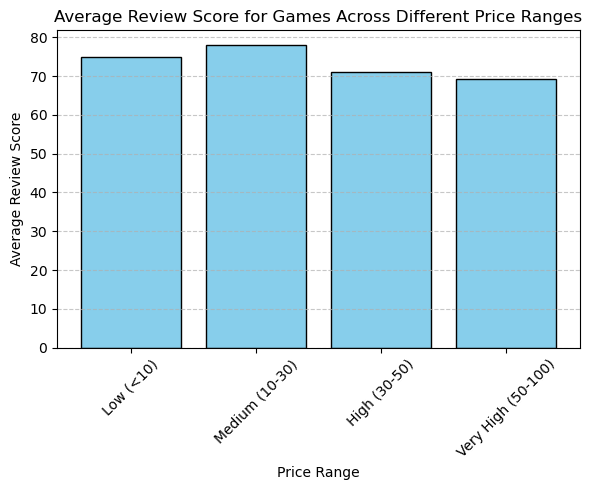

In [318]:
plt.figure(figsize=(6, 5))
plt.bar(avg_review_by_price['Price Range'], avg_review_by_price['reviewScore'], 
        color='skyblue', edgecolor='black')
plt.title('Average Review Score for Games Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Conclusion**
- The average review score for games tends to be highest in the Medium (10-30) price range, followed by the Low (<10) range. As the price increases (especially in the High (30-50) and Very High (50-100) ranges), the average review score tends to decline. However, the average review scores for price ranges are relatively close to each other.
- As analyzed, the average review score differs slightly across price ranges, suggesting that price doesn't strongly impact the review scores for these games.

### `Question 3`: What percentage of the total revenue is generated by the top 5 publishers, and how does this reflect market concentration?

#### **What's the insight of the question?**

- Answer this question can understand the revenue concentration provides insights into industry dynamics and the competitiveness of smaller players.

#### **Analyzing**

- First, calculate the total revenue by summing up all the values in the revenue column.
- Then, group the data by publisher and calculate the total revenue for each publisher, sorting them in descending order.
- The top 5 publishers are selected, and their combined revenue is computed.
- Finally, the percentage of the total revenue generated by these top 5 publishers is calculated and displayed, providing insights into how much of the total revenue comes from the leading publishers.

In [319]:
# Calculate the total revenue
total_revenue = data['revenue'].sum()
revenue_by_publisher = data.groupby('publishers')['revenue'].sum().sort_values(ascending=False)
top_5_revenue = revenue_by_publisher.head(5)

# Calculate the percentage of total revenue generated by the top 5 publishers
top_5_total_revenue = top_5_revenue.sum()
percentage_revenue_top_5 = (top_5_total_revenue / total_revenue) * 100
print("Top 5 Publishers by Revenue:")
print(top_5_revenue)
print(f"\nPercentage of total revenue generated by the top 5 publishers: {percentage_revenue_top_5:.2f}%")

Top 5 Publishers by Revenue:
publishers
Game Science                  837793356.0
PlayStation Publishing LLC    508885199.0
Pocketpair                    392328553.0
Newnight                      217017892.0
CAPCOM Co., Ltd.              117881025.0
Name: revenue, dtype: float64

Percentage of total revenue generated by the top 5 publishers: 52.52%


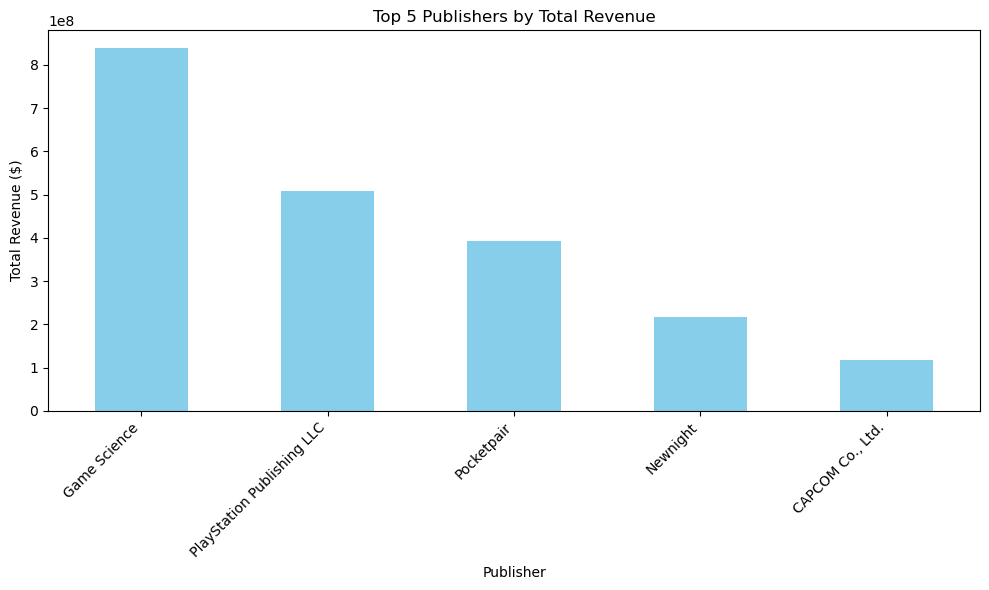

In [320]:
plt.figure(figsize=(10, 6))
top_5_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Publishers by Total Revenue')
plt.xlabel('Publisher')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Conclusion**
- **Game Science** stands out as the clear leader in total revenue, surpassing 800 million dollars. This significant gap suggests strong market performance, possibly due to successful game titles, strategic marketing, or expansion into global markets.
- **PlayStation Publishing LLC** and **Pocketpair** still maintain competitive positions with revenues of around 500 million and 400 million dollars, respectively. These publishers appear to be solid players, showing potential for future growth or maintaining steady market presence.
- **Newnight** and **CAPCOM Co., Ltd.** exhibit notably lower revenue figures compared to the top three publishers. This could indicate that they have smaller market shares or are still in the process of expanding their reach or diversifying their game portfolios.
- This bar chart highlights a clear hierarchy among the top five publishers, with **Game Science** leading by a substantial margin. While **PlayStation Publishing LLC** and **Pocketpair** are strong competitors, **Newnight** and **CAPCOM Co., Ltd.** lag behind significantly. The revenue distribution indicates a highly competitive market where the top publishers have a commanding presence.
- This chart may serve as a snapshot of the industry's current state, showcasing both the success of leading companies and the challenges faced by others in maintaining or increasing their market share.

## **REFLECTION**

### **NGUYEN DANG NHAN - 22127302**

Difficulties:
- Struggling to comprehend the structure, content, or context of the dataset, have trouble finding meaningful questions.
- Uncertainty about the legality of using the dataset

Learned:
- Always verify the dataset's licensing and permissions, and be aware of relevant data protection laws before using it

### **TA MINH THU - 22127404**

Difficulties:
- Struggling to use github's merge function for .ipynb files
- Have trouble finding meaningful questions.

Learned:
- Gained an understanding of how GitHub works.

### **CHU THUY QUYNH - 22127359**

Difficulties:
-  The numerical data has too many outliers, so when removing them, it causes the loss of many meaningful values
- Spending extra time investigating whether outliers are errors or meaningful insights.
- Have trouble finding meaningful questions.

Learned:
- When outliers make up a large portion of the data, caution is needed when removing them. To remove them, a thorough analysis is required, applying expertise to determine in each case whether they should be removed or not.

### **TEAM REFLECTION**
**If you have more time, what would you do?**
- We would look for more complicated questions to analyze and understand more about the dataset.
-  Learn more about data modelling to create models to analyze, visualize and answer questions.
- Ask more "what-if" questions to explore potential scenarios.

## **REFERENCES**

To finish this project, we use:

- [Dataset](https://www.kaggle.com/datasets/alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024?resource=download)
- [Publisher Classes](https://gamalytic.com/about)
- [Matplotlib](https://matplotlib.org/stable/plot_types/index.html)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)